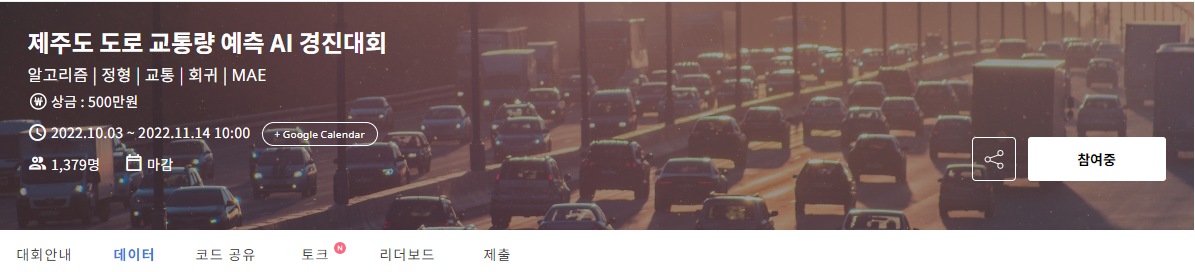

# <제주도 도로 교통량 예측 AI 프로젝트 개시>

## [배경] 
제주도내 주민등록인구는 2022년 기준 약 68만명으로, 연평균 1.3%정도 매년 증가하고 있습니다.

또한 외국인과 관광객까지 고려하면 전체 상주인구는 90만명을 넘을 것으로 추정되며, 

제주도민 증가와 외국인의 증가로 현재 제주도의 교통체증이 심각한 문제로 떠오르고 있습니다.

## [주제]
제주도 도로 교통량 예측 AI 알고리즘 개발

## [설명]
`제주도의 교통 정보로부터 도로 교통량 회귀 예측`



# [Dataset Info.]

### 1. train.csv [파일] 
- 2022년 8월 이전 데이터만 존재 (단, 날짜가 모두 연속적이지 않음)
- 4,701,217개의 데이터
- id : 샘플 별 고유 id
- 날짜, 시간, 교통 및 도로구간 등 정보
- target : 도로의 차량 평균 속도(km)


### 2. test.csv [파일]
- 2022년 8월 데이터만 존재 (단, 날짜가 모두 연속적이지 않음)
- 291,241개의 데이터
- id : 샘플 별 고유 id
- 날짜, 시간, 교통 및 도로구간 등 정보


### 3. data_info.csv [파일]
- 데이터의 각 Column별 추가 설명
- 가급적 pandas 패키지를 이용하여 오픈하는 것을 권장합니다. (엑셀에서 load시 - 한글이 깨져 보일 수 있음)


### 4. sample_submission.csv [제출양식]
- id : 샘플 별 고유 id
- target : 도로의 차량 평균 속도(km)

### 결론

평균속도로 교통량 측정하기.

데이터를 확인한 결과는 다음과 같습니다.

-base_date(날짜) : 2021.09.01 - 2022.07.31

-day_of_week(요일) : 월,화,수,목,금,토,일
<day_of_week>
- 금:              684024
- 수:              675583
- 목:              674070
- 일:              673632
- 토:              669767
- 화:              662498
- 월:              661643




-base_hour(시간대) : 0 - 23

-0:     154158

-3:    155938

-4:   165284

-2:     169322

-5:     181128

-1:     182353

-23:    184229

-6:     189418

-7:     199061

-22:    200629

-8:     201875

-21:    203585

-20:    205059

-9:     205327

-10:    206316

-18:    207500

-17:    208377

-16:    208420

-11:    208515

-19:    209870

-12:    211833

-14:    214182

-13:    214297

-15:    214541

-lane_count(차로수) : 1, 2, 3

-3     790594

-1    1558531

-2    2352092

-road_rating(도로등급) : 103, 106, 107

-road_name(도로이름) : 61 가지의 도로명(일반국도12호선, -(결측치) 등....)

호근로             587
호서중앙로          2819
남조로            6813
아봉로            7342
애원로            7718
             ...   
일반국도11호선     215701
일반국도95호선     248181
일반국도16호선     554510
      -            569463
일반국도12호선    1046092




-multi_linked(중용구간 여부) : 0, 1

-connect_code(연결로 코드) : 0, 103

-maximum_speed_limit(최고속도제한) : 30, 50, 60, 70, 80

-40.0       6790

-30.0     229761

-80.0     700334

-70.0     995077

-50.0    1103682

-60.0    1665573

-vehicle_restricted(통과제한차량) : 0

-weight_restricted(통과제한하중) :0/ 43200/ 32400/ 50000

-50000.0      18677

-32400.0     239305

-43200.0     410361

-0.0        4032874

-height_restricted(통과제한높이) : 0

-road_type(도로유형) : 0, 3

-3     964100

-0    3737117

-start_node_name, end_node_name : 487 도로, 장소명

-CU서귀호근로점             744

-서귀포시 호근동 1838-4      744

-성미가든                 788

-와산리                  881

-외산리사무소               934
                   ...  
-봉개교 시종점            24290

-영주교                24381

-미수2교               26635

-산신주유소              29386

-고성교차로              42169
------------------------------------------
-CU서귀호근로점             587

-서귀포시 호근동 1838-4      744

-서귀포시 서호동 308-6       744

-대흘교차로                788

-외산리사무소               881
                   ...  
-영주교                24370

-미수2교               26621

-구엄교                27510

-산신주유소              29202

-고성교차로              42265

-start_latitude, start_longitude : 586 가지 출발점 위,경도

-end_latitude, end_longitude : : 586 가지 도착점 위,경도


-start_turn_restricted : 있음, 없음


-end_turn_restricted : 있음, 없음



-target : 평균속도(예측해야할 값)

-103.0           1

-98.0            1

-96.0            2

-113.0           2

-112.0           2
          ...  
-51.0          107347

-54.0          108040

-50.0          108822

-49.0          110244

-48.0          112044

# 1. Data Load & Data library Load

data_info에서 떠오르는 생각 & 도메인
1. 위도 경도는 지도 관련 데이터를 넣어야 할듯 싶다.
2. 중용구간의 의미는?
- 도로 노선이 변경되었을 경우, 노선의 변화를시간적으로
관리할 수 있는 이력관리체계가 정립되어 있지 않아 노선변경 전의 위치와 노선변경 후의 위치를 바탕으로 한 해당년도별 도로 관련 정보의 조회 등 도로관리 정보화 사업수행에 어려운 점이 있다. 특히 일반국도는 고속국도에 비해 시가지 우회 도로 개설, 도로의선형 개선 사업 등의 도로의 노선 변화 및 연장 변화가 심하여 합리적인 이력관리체계가 더욱 필요하다. 일반국도의 도로 구간은 전용구간과 중용구간으로 나눌 수 있다. 전용구간이란하나의 노선이 도로를 전적으로 사용하는 구간을 말하며 2개 이상의 노선이 도로의 일정 구간을 공동으로 사용하는 구간을 중용구간이라한다. 2002년 현재 우리나라 전체 일반국도의총 연장은 약 12,420km 정도이며, 이중 약1200km 정도가 2개 이상의 노선이 공동으로 사용하는 중용구간이다.

3. 통과제한하중: 과적으로인한 도로 파괴과적...
4. 통과제한차량: 무게가 우선 부피도 제재도 한다.
5. 도로등급: 도로상태를 보고 정함.
6. 승용차: 1차선~3차선
7. 화물차는 3차선
8. 일반도로/고속도로/추월선(고속도로에서 1차선에서만 가능)
9. 노선: 교통 기관이 통과하는 출발 지점과 목적 지점을 잇는 선이다. 철도 노선, 버스 노선, 항공 노선, 항로 등이 있다.
10. 데이터 조사기간: 2021.09.31 ~ 2022.07.31 거의 1년치인데 관광객을 목표로해서 저 날까기간을 둔가 아닐까? 싶다.

In [ ]:
# !pip install catboost
# !pip install xgboost
# !pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
# 데이터분석 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib as mpl
import os
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
import gc
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import math
from sklearn.model_selection import StratifiedKFold as kfold
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import lightgbm as lgb
# from sklearn.model_selection import StratifiedKFold as kfold
# from sklearn.ensemble import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures



# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'NanumGothic'
plt.rc("font", family="Malgun Gothic")
plt.rc('font', family='NanumBarunGothic') 

import warnings
warnings.filterwarnings('ignore')

In [4]:
# 제주도 대회 데이터 불러오기
base_path = "/content/drive/MyDrive/Colab Notebooks/머신러닝 프로젝트 with 패스트캠퍼스, 김재승/제주도 도로 교통량 예측 AI 경진대회/"

train = pd.read_csv(base_path + "train.csv")
test = pd.read_csv(base_path + "test.csv")
submission = pd.read_csv(base_path + "sample_submission.csv")
data_info = pd.read_csv(base_path + "data_info.csv")

# 2. EDA

In [127]:
train.head(10)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
5,TRAIN_0000005,20210913,월,7,2,107,경찰로,0,0,60.0,...,0,시청입구2,33.249949,126.505664,없음,서호2차현대맨션203동,33.252183,126.506069,없음,28.0
6,TRAIN_0000006,20220106,목,0,2,107,-,0,0,60.0,...,0,가동,33.418412,126.268029,없음,나동,33.414175,126.269378,없음,39.0
7,TRAIN_0000007,20211213,월,16,2,107,외도천교,0,0,60.0,...,3,외도천교,33.482392,126.441622,없음,외도천교,33.482332,126.442266,없음,28.0
8,TRAIN_0000008,20211004,월,15,2,107,경찰로,0,0,60.0,...,0,신성교회,33.253074,126.506393,없음,서호2차현대맨션203동,33.252183,126.506069,없음,14.0
9,TRAIN_0000009,20211208,수,2,1,103,일반국도16호선,0,0,50.0,...,0,양수장,33.361717,126.766958,없음,제2가시교,33.364336,126.769409,없음,52.0


In [128]:
train.tail(10)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
4701207,TRAIN_4701207,20211229,수,21,2,103,일반국도12호선,0,0,50.0,...,0,하귀입구,33.485264,126.410896,없음,미수2교,33.483719,126.405338,없음,51.0
4701208,TRAIN_4701208,20220323,수,19,2,107,-,0,0,80.0,...,3,제2태흥교,33.287356,126.736525,없음,제2태흥교,33.287582,126.737512,없음,61.0
4701209,TRAIN_4701209,20210909,목,10,1,103,일반국도11호선,0,0,60.0,...,3,윤고교,33.348305,126.614293,없음,윤고교,33.348691,126.614599,없음,48.0
4701210,TRAIN_4701210,20220105,수,14,1,107,관광단지로,0,0,30.0,...,0,산신주유소,33.255215,126.414236,없음,관광단지입구,33.258119,126.415840,없음,25.0
4701211,TRAIN_4701211,20211230,목,14,1,103,일반국도16호선,0,0,50.0,...,0,우사,33.358358,126.271652,없음,상명,33.359839,126.267783,없음,27.0
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0
4701216,TRAIN_4701216,20211019,화,6,2,107,경찰로,0,0,60.0,...,0,서귀포경찰서,33.256785,126.508940,없음,시민공원,33.257130,126.510364,없음,35.0


In [129]:
data_info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [5]:
# 총 60개의 도로, 586개의 시작/도착 (위경도), 487개의 시작/도착 도로명 
column_names = train.columns.values.tolist()   # tolist() 는 리스트로 묶어주는 함수

type(column_names)
print(column_names, "\n")


for i in column_names:
     print(f"{i} = {train[i].nunique()}")  # nunique()는 데이터에 고유값들의 수를 출력해주는 함수입니다

['id', 'base_date', 'day_of_week', 'base_hour', 'lane_count', 'road_rating', 'road_name', 'multi_linked', 'connect_code', 'maximum_speed_limit', 'vehicle_restricted', 'weight_restricted', 'height_restricted', 'road_type', 'start_node_name', 'start_latitude', 'start_longitude', 'start_turn_restricted', 'end_node_name', 'end_latitude', 'end_longitude', 'end_turn_restricted', 'target'] 

id = 4701217
base_date = 281
day_of_week = 7
base_hour = 24
lane_count = 3
road_rating = 3
road_name = 61
multi_linked = 2
connect_code = 2
maximum_speed_limit = 6
vehicle_restricted = 1
weight_restricted = 4
height_restricted = 1
road_type = 2
start_node_name = 487
start_latitude = 586
start_longitude = 586
start_turn_restricted = 2
end_node_name = 487
end_latitude = 586
end_longitude = 586
end_turn_restricted = 2
target = 102


In [131]:
column_names = train.columns.values.tolist() 

for i in column_names:
     print(f"{i} = {train[i].unique()}")  # 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수

id = ['TRAIN_0000000' 'TRAIN_0000001' 'TRAIN_0000002' ... 'TRAIN_4701214'
 'TRAIN_4701215' 'TRAIN_4701216']
base_date = [20220623 20220728 20211010 20220311 20211005 20210913 20220106 20211213
 20211004 20211208 20220724 20211229 20220507 20220203 20220501 20220701
 20211001 20220319 20220210 20220119 20210907 20220205 20210927 20220107
 20210903 20220116 20220612 20210928 20211028 20211018 20220522 20211205
 20220523 20220525 20220702 20220610 20210917 20220201 20211019 20220306
 20210910 20210920 20211227 20210921 20220213 20220215 20220530 20220208
 20220721 20220608 20220114 20220115 20220512 20211030 20211024 20211202
 20220125 20220104 20220131 20220317 20220214 20211214 20220220 20211023
 20220606 20220529 20220221 20220602 20211011 20211015 20211002 20220607
 20220508 20211105 20220102 20210909 20210929 20210918 20220207 20210901
 20211226 20210906 20211102 20220209 20220218 20220219 20211101 20220505
 20220118 20220628 20211104 20211228 20220304 20220223 20220331 20220322
 202

### EDA_시각화

In [132]:
# one-hot_encoding
# pd.get_dummies(train, columns=["road_name", "day_of_week", "base_hour", ""])

# train_ = train[["day_of_week",'start_turn_restricted' ,'end_turn_restricted']]
# train_encoding_dummy = pd.get_dummies(train_, columns=["day_of_week",'start_turn_restricted' ,'end_turn_restricted'])

In [133]:
# nominal 데이터 인데 labelEncoder를 사용했음.
from sklearn.preprocessing import LabelEncoder

items =  ["day_of_week",'start_turn_restricted' ,'end_turn_restricted']
train_encoding = train.copy()
encoder = LabelEncoder()

for i in items:
    encoder = LabelEncoder()
    encoder.fit(train_encoding[i])
    train_encoding[i] = encoder.transform(train_encoding[i])

train_encoding.columns

Index(['id', 'base_date', 'day_of_week', 'base_hour', 'lane_count',
       'road_rating', 'road_name', 'multi_linked', 'connect_code',
       'maximum_speed_limit', 'vehicle_restricted', 'weight_restricted',
       'height_restricted', 'road_type', 'start_node_name', 'start_latitude',
       'start_longitude', 'start_turn_restricted', 'end_node_name',
       'end_latitude', 'end_longitude', 'end_turn_restricted', 'target'],
      dtype='object')

In [134]:
from sklearn.preprocessing import LabelEncoder

items =  ["day_of_week",'start_turn_restricted' ,'end_turn_restricted']
test_encoding = test.copy()
encoder = LabelEncoder()

for i in items:
    encoder = LabelEncoder()
    encoder.fit(test_encoding[i])
    test_encoding[i] = encoder.transform(test_encoding[i])

# 데이터 분포확인 

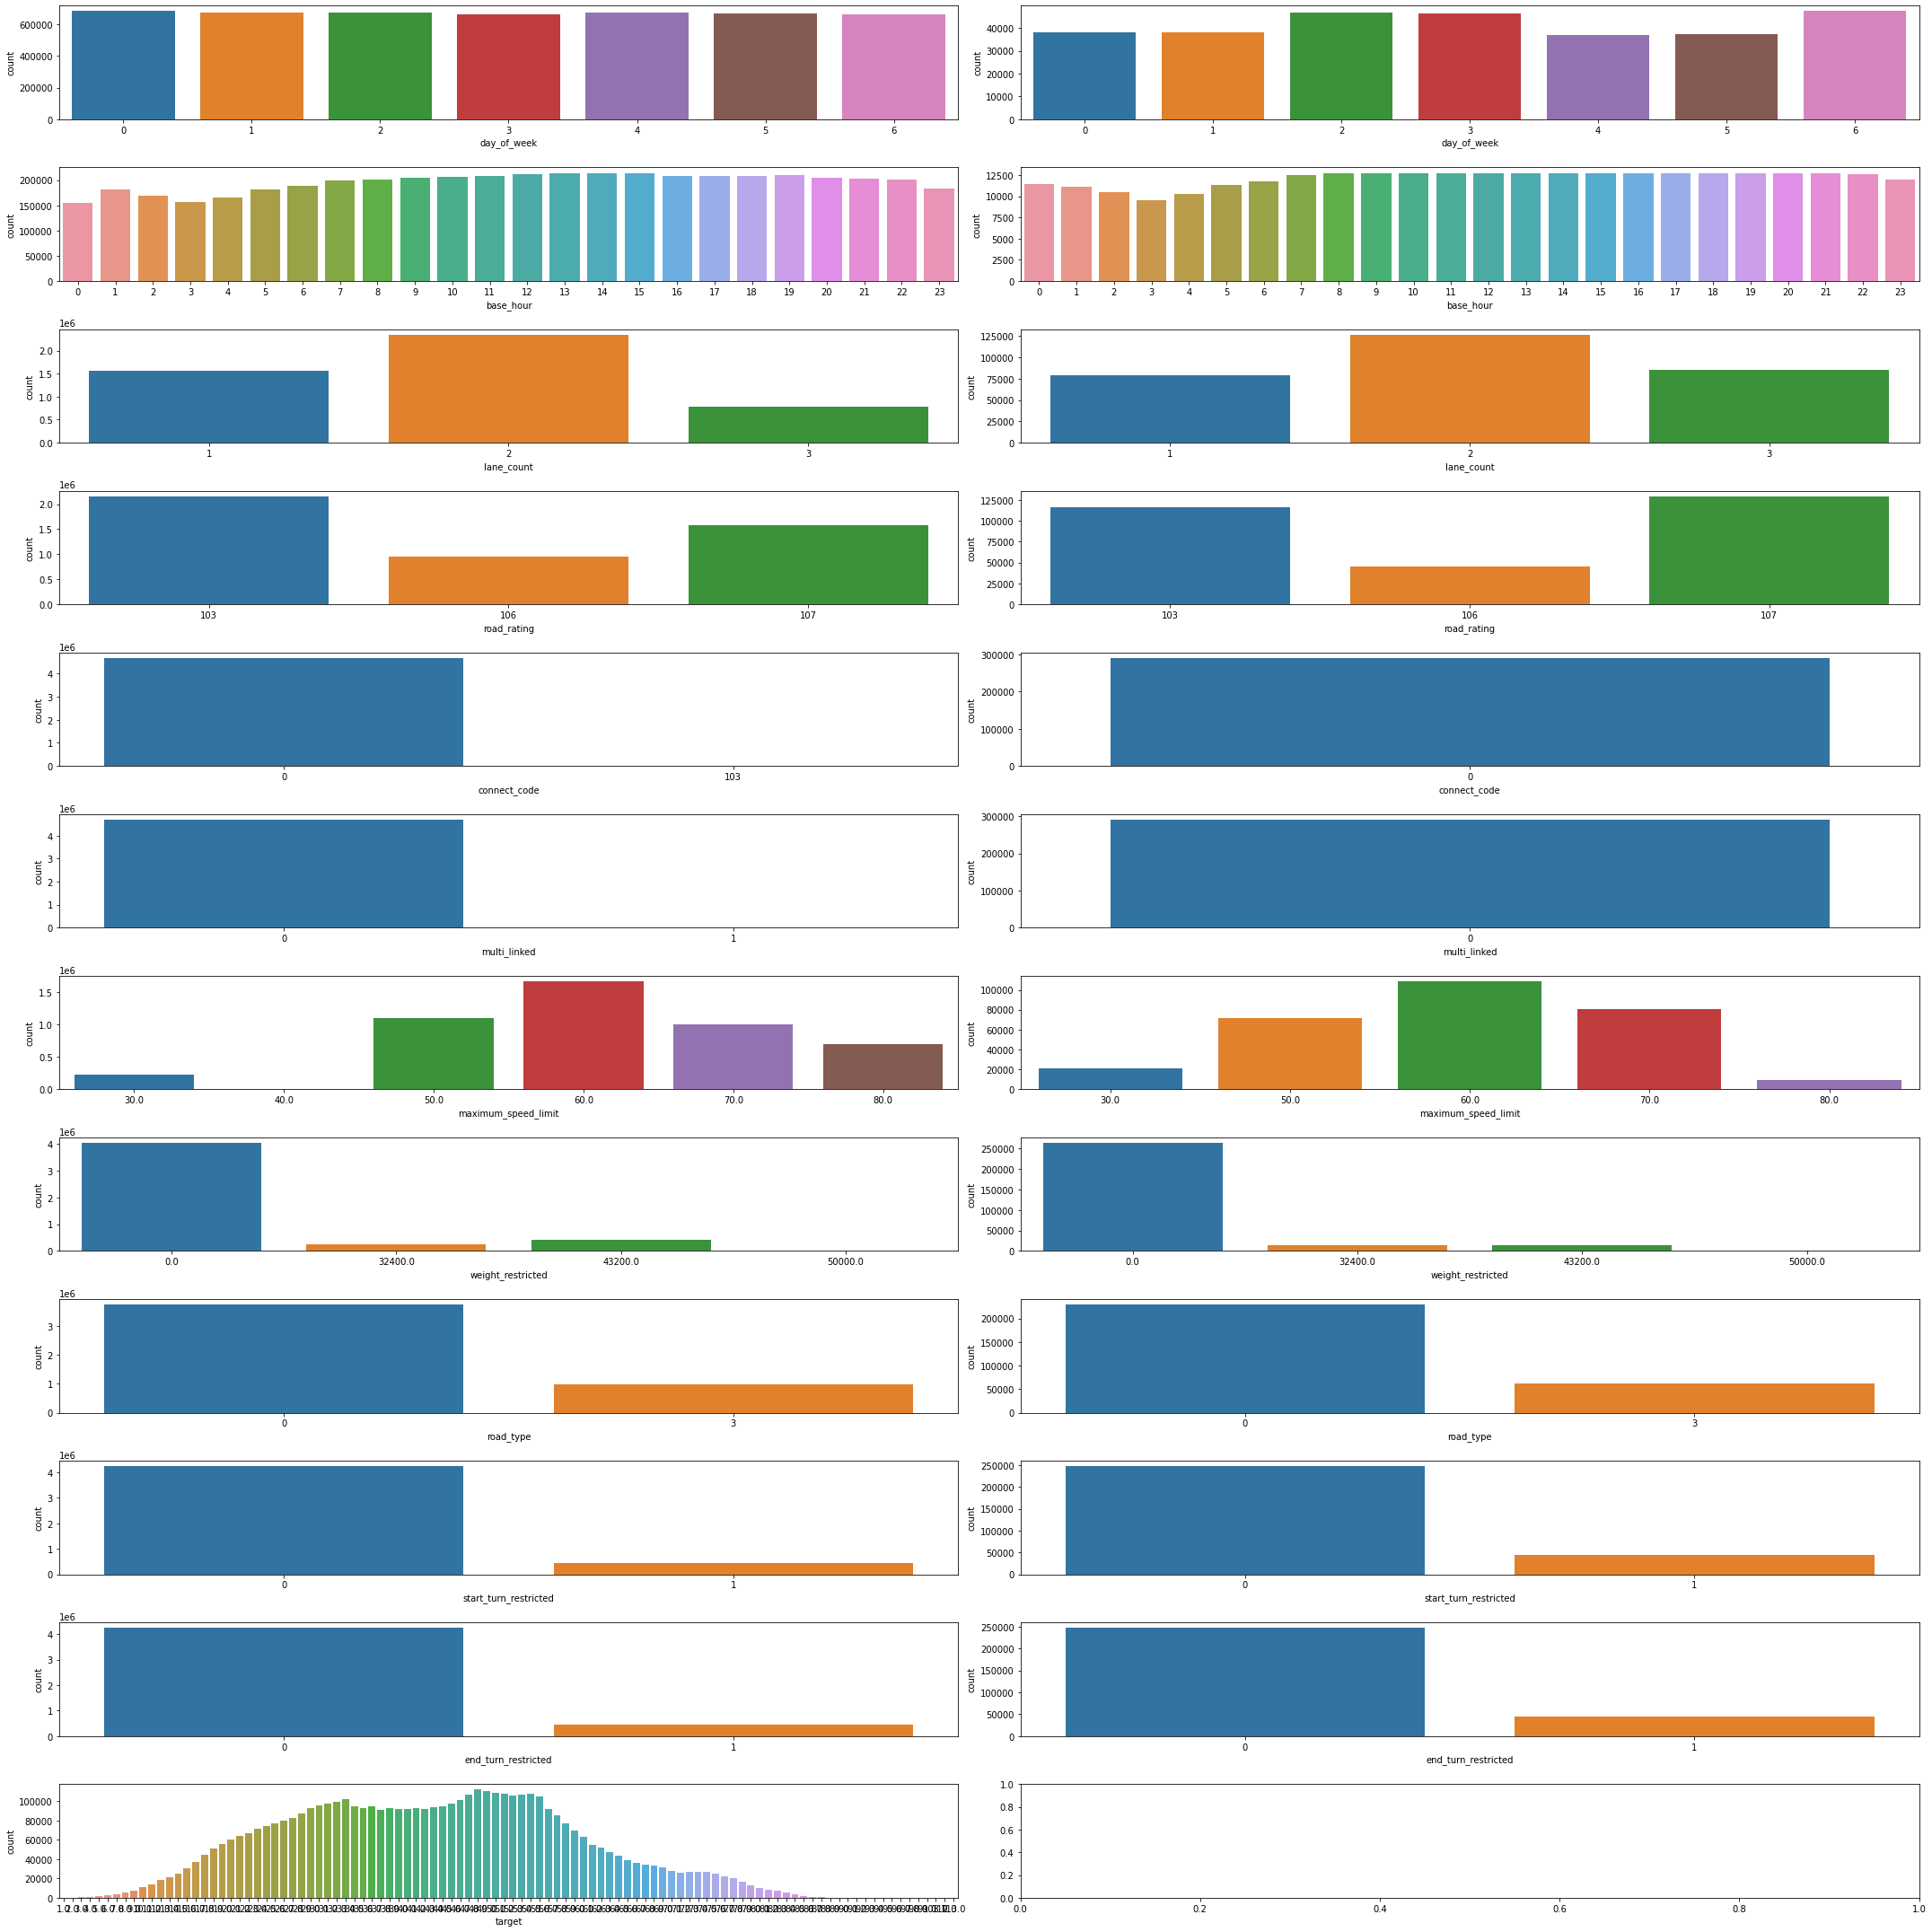

In [135]:
# Train / Test 세트 비교
# train, test = 0-금  1-목   2-수  3-월  4-일  5-토  6-화
# start_trun_restrict,end_turn_restrict = 0:없음, 1:있음
fig, axes = plt.subplots(12, 2, figsize=(30,30))

sns.countplot(x='day_of_week', data=train_encoding, ax=axes[0][0])
sns.countplot(x='day_of_week', data=test_encoding, ax=axes[0][1])
sns.countplot(x='base_hour', data=train_encoding, ax=axes[1][0])
sns.countplot(x='base_hour', data=test_encoding, ax=axes[1][1])
sns.countplot(x='lane_count', data=train_encoding, ax=axes[2][0])
sns.countplot(x='lane_count', data=test_encoding, ax=axes[2][1])
sns.countplot(x='road_rating', data=train, ax=axes[3][0])
sns.countplot(x='road_rating', data=test, ax=axes[3][1])
sns.countplot(x='connect_code', data=train, ax=axes[4][0])
sns.countplot(x='connect_code', data=test, ax=axes[4][1])
sns.countplot(x='multi_linked', data=train_encoding, ax=axes[5][0])
sns.countplot(x='multi_linked', data=test_encoding, ax=axes[5][1])
sns.countplot(x='maximum_speed_limit', data=train_encoding, ax=axes[6][0])
sns.countplot(x='maximum_speed_limit', data=test_encoding, ax=axes[6][1])
sns.countplot(x='weight_restricted', data=train_encoding, ax=axes[7][0])
sns.countplot(x='weight_restricted', data=test_encoding, ax=axes[7][1])
sns.countplot(x='road_type', data=train_encoding, ax=axes[8][0])
sns.countplot(x='road_type', data=test_encoding, ax=axes[8][1])
sns.countplot(x='start_turn_restricted', data=train_encoding, ax=axes[9][0])
sns.countplot(x='start_turn_restricted', data=test_encoding, ax=axes[9][1])
sns.countplot(x='end_turn_restricted', data=train_encoding, ax=axes[10][0])
sns.countplot(x='end_turn_restricted', data=test_encoding, ax=axes[10][1])
sns.countplot(x='target', data=train, ax=axes[11][0])

plt.tight_layout()
plt.show()

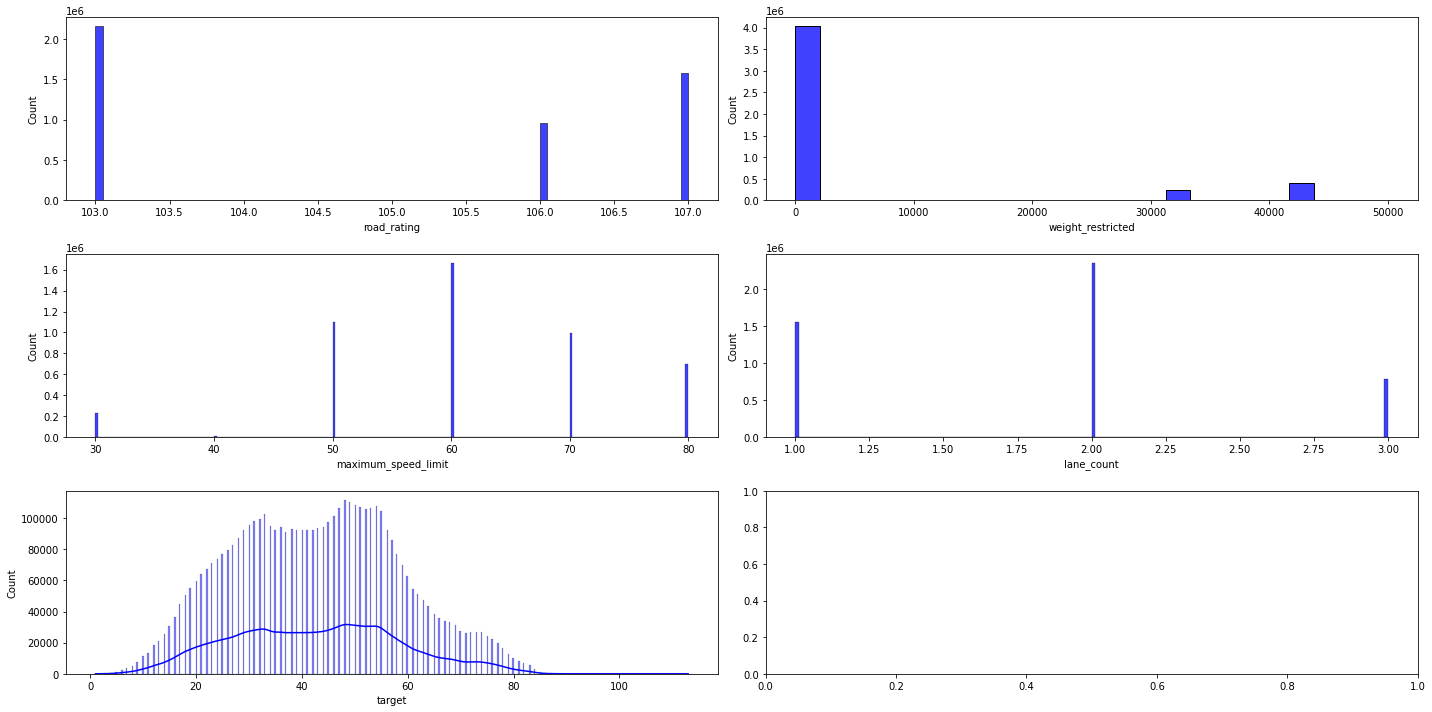

In [136]:
# road_rating = 3개의 값.
# weight_restricted = 대부분 0.
# maximum_speed_limit = 60이 제일 많음.
# lane_count는 2차선이 제일 많음
# 연속적인 데이터는 없음.


fig, axes = plt.subplots(3, 2, figsize=(20,10))

sns.histplot(x=train['road_rating'],kde=False,ax=axes[0][0], color='blue')  #kde는 선을 넣을것인지 아닌지를 표시한다.
sns.histplot(x=train['weight_restricted'],kde=False,ax=axes[0][1], color='blue')
sns.histplot(x=train['maximum_speed_limit'],kde=False,ax=axes[1][0], color='blue')
sns.histplot(x=train['lane_count'],kde=False,ax=axes[1][1], color='blue')
sns.histplot(x=train['target'],kde=True,ax=axes[2][0], color='blue')


plt.tight_layout()
plt.show()

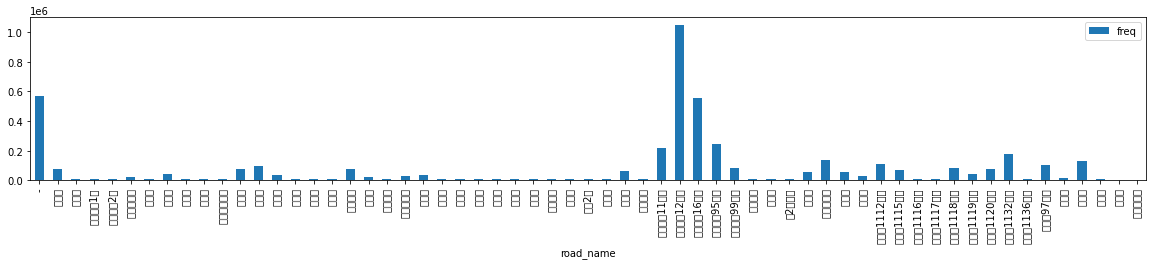

In [144]:
train1 = train.copy()
train1['freq'] = train1.groupby('road_name')['road_name'].transform('count')
train1 = train1[['road_name','freq']]
train1 = train1.groupby('road_name').mean().reset_index()
train1.plot.bar(x='road_name',y='freq',figsize=(20,3))
plt.show()

# 두 변수(열)간의 상관관계 분석

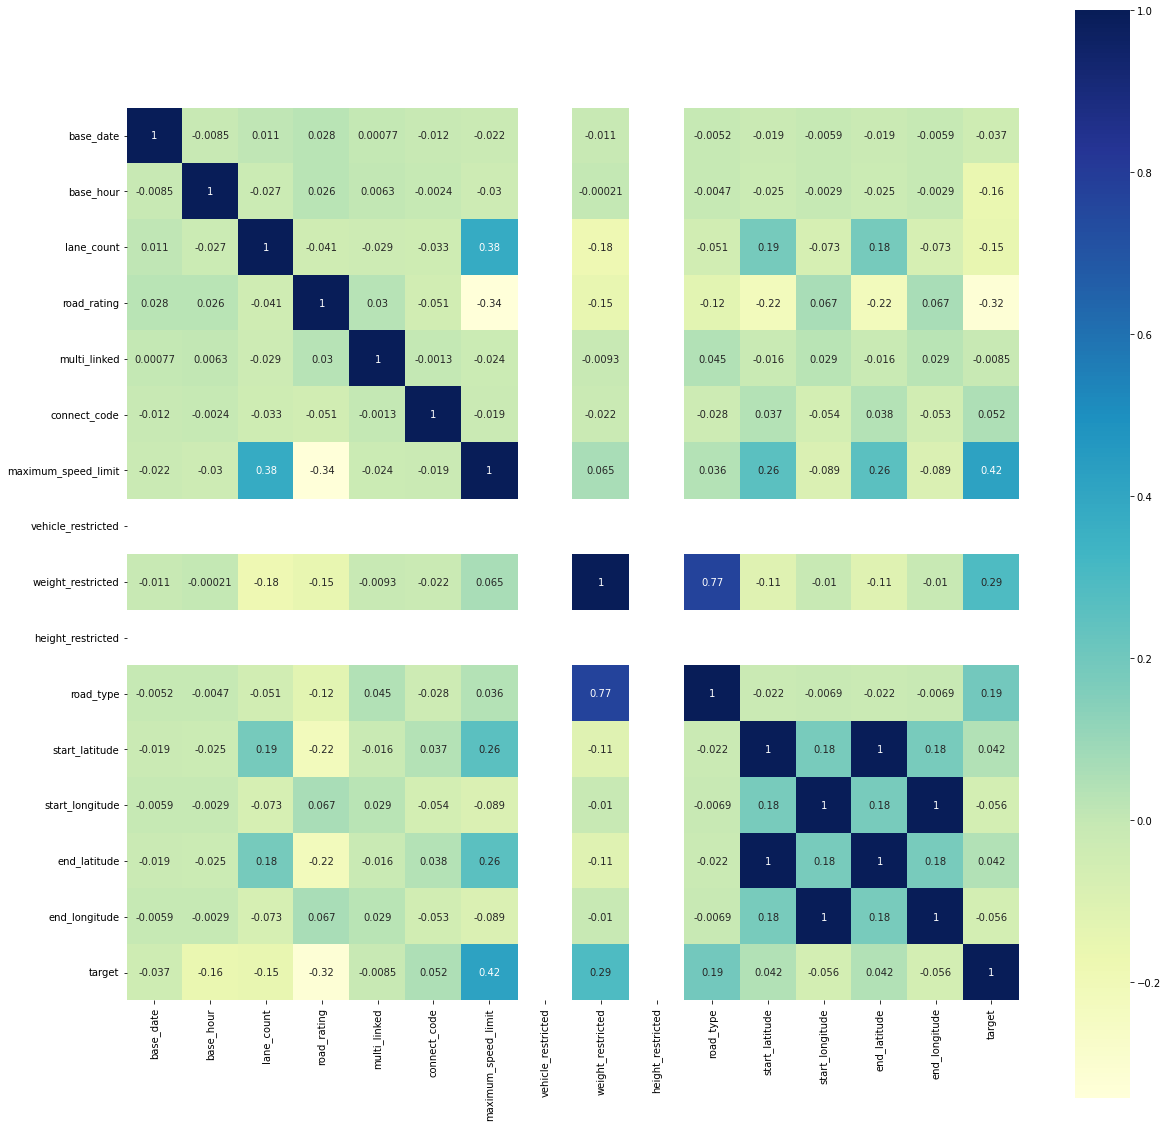

In [277]:
f, ax = plt.subplots(figsize=(20,20))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),square=True, annot=True, ax=ax, cmap="YlGnBu")

In [159]:
# 그룹화
train_date = train_encoding[['base_date','target']]
train_date = train_date.groupby('base_date').mean().reset_index()

train_time = train_encoding[['base_hour','target']]
train_time = train_time.groupby('base_hour').mean().reset_index()

train_day = train_encoding[['day_of_week','target']]
train_day = train_day.groupby('day_of_week').mean()
train_day = train_day.reset_index()

train_name = train_encoding[['road_name','target']]
train_name = train_name.groupby('road_name').mean().reset_index()

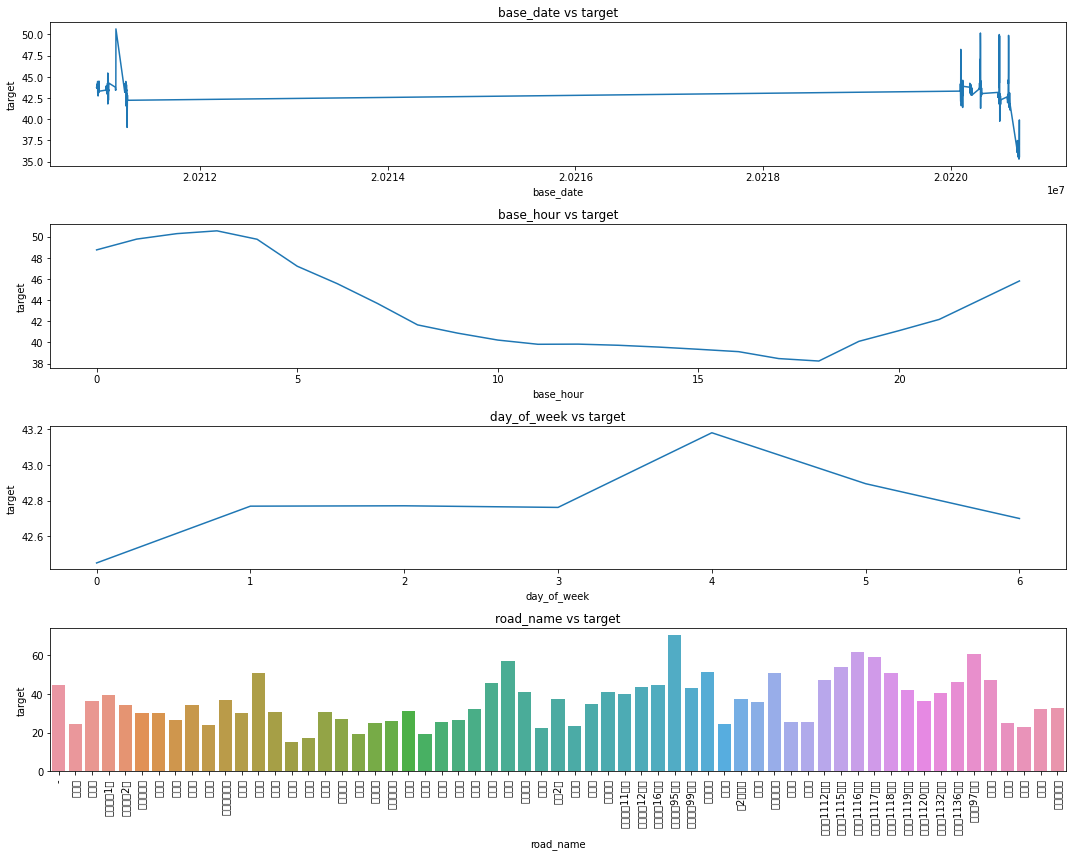

In [158]:
# 추이 그래프
fig, axes = plt.subplots(4, figsize=(15,12))

sns.lineplot(x='base_date',y='target',data=train_date,ax=axes[0]).set(title='base_date vs target')
sns.lineplot(x='base_hour',y='target',data=train_time,ax=axes[1]).set(title='base_hour vs target')
sns.lineplot(x='day_of_week',y='target',data=train_day,ax=axes[2]).set(title='day_of_week vs target')
sns.barplot(x='road_name',y='target',data=train_name,ax=axes[3]).set(title='road_name vs target')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [161]:
# object 타입을 datetime64[ns] 타입으로 바꾼다 
train_encoding['base_date'] = pd.to_datetime(train_encoding['base_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [163]:
# 년/월/일로 분리
train_encoding['year']= train_encoding['base_date'].dt.year
train_encoding['month']= train_encoding['base_date'].dt.month
train_encoding['day']= train_encoding['base_date'].dt.day

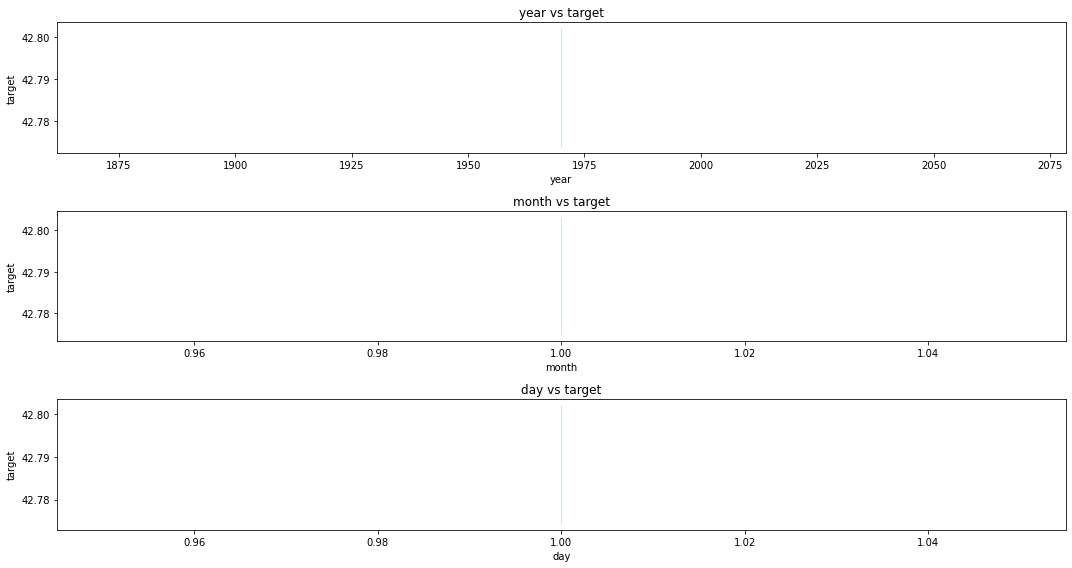

In [164]:
# 년도/월/일별 추이 그래프
# year: 뚜렷한 차이 없음.
# month: 7월 교통량 급증가 -> 여름휴가?
# day: 뚜렷한 차이 없음.
# 월별 차이가 제일 뚜렷함.

# fig, axes = plt.subplots(3, figsize=(15,8))

# sns.lineplot(x='year',y='target',data=train_encoding,ax=axes[0]).set(title='year vs target')
# sns.lineplot(x='month',y='target',data=train_encoding,ax=axes[1]).set(title='month vs target')
# sns.lineplot(x='day',y='target',data=train_encoding,ax=axes[2]).set(title='day vs target')

# plt.tight_layout()
# plt.show()

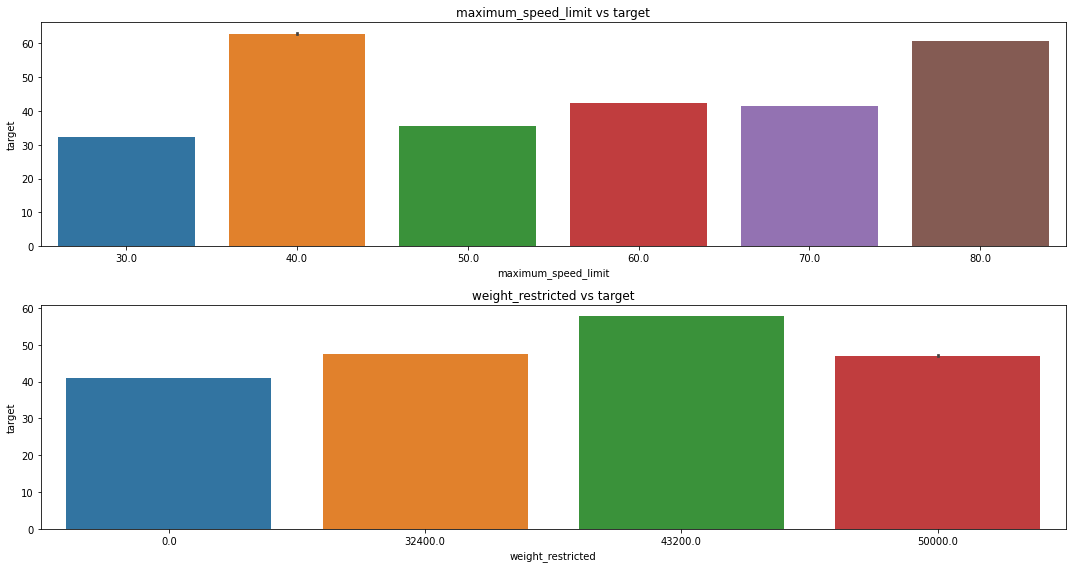

In [152]:
# 최대속도제한,무게제한 VS t=target
# 최대속도제한에서 30km에서 평균속도 30km
# 무게제한이 없는 곳일수록 교통혼잡하고
# 최대속도제한인 30,50, 60, 70인 곳에서 교통혼잡이 일어난다는 것을 알았다.
fig, axes = plt.subplots(2, figsize=(15,8))

sns.barplot(x='maximum_speed_limit',y='target',data=train,ax=axes[0]).set(title='maximum_speed_limit vs target')
sns.barplot(x='weight_restricted',y='target',data=train,ax=axes[1]).set(title='weight_restricted vs target')

plt.tight_layout()
plt.show()

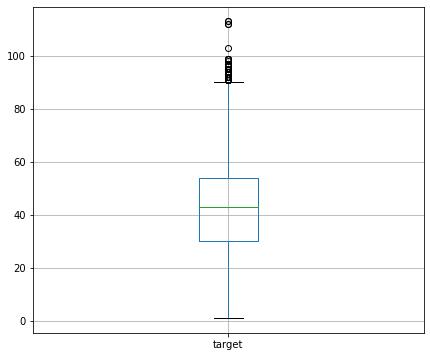

In [166]:
plt.figure(figsize=(7,6))
boxplot = train.boxplot(column=["target"])
plt.show()

In [195]:
train_temp = train[["road_name", "maximum_speed_limit"]]
df_max_speed_per_nodename = train_temp.groupby("road_name").max()
df_max_speed_per_nodename.rename(columns = {"maximum_speed_limit" : "maximum_speed_limit(max)"}, inplace = True)


In [196]:
df_min_speed_per_nodename = train_temp.groupby("road_name").min()
df_min_speed_per_nodename.rename(columns = {"maximum_speed_limit" : "maximum_speed_limit(min)"}, inplace = True)

In [197]:
# 도로별 최고속도 및 최저속도 비교
result = pd.concat([df_max_speed_per_nodename,df_min_speed_per_nodename], axis=1)
result

,maximum_speed_limit(max),maximum_speed_limit(min)
road_name,,
-,80.0,30.0
경찰로,60.0,60.0
고평교,50.0,50.0
관광단지1로,30.0,30.0
관광단지2로,30.0,30.0
...,...,...
첨단로,50.0,50.0
태평로,50.0,50.0
한천로,60.0,60.0


In [248]:
# "-" 값 제거 임시로
index1 = train[train["road_name"]== "-"].index
train.drop(index1, inplace=True)

In [ ]:
# 도로별 최고속도  top 10 확인
# 도로별 최저속도   top 10 확인

In [199]:
# 도로별 max와 min이 서로다른 구간
result.loc[result["maximum_speed_limit(max)"] != result["maximum_speed_limit(min)"]]

,maximum_speed_limit(max),maximum_speed_limit(min)
road_name,,
-,80.0,30.0
남조로,60.0,50.0
동홍로,60.0,50.0
산서로,60.0,50.0
새서귀로,60.0,30.0
서사로,50.0,30.0
신대로,70.0,30.0
연북로,50.0,30.0
일반국도11호선,70.0,30.0


In [223]:
# maximum speed : 30, 50, 60, 70 일때 확인
# 위의 네개 값에서 교통혼잡이 많이 일어날거라 추론함.

trafic_jam_30 = result.loc[result["maximum_speed_limit(max)"] <= 30]
trafic_jam_30

,maximum_speed_limit(max),maximum_speed_limit(min)
road_name,,
관광단지1로,30.0,30.0
관광단지2로,30.0,30.0
관광단지로,30.0,30.0
시민광장로,30.0,30.0
호근로,30.0,30.0


In [253]:
jam_list_30 = trafic_jam_30.index.tolist()
df_temp = train.loc[train["road_name"].isin(jam_list_30)]
fig = px.histogram(df_temp, x="target", color="road_name")
fig.show()

In [233]:
trafic_jam_50 = result.loc[result["maximum_speed_limit(max)"] == 50]
trafic_jam_50

,maximum_speed_limit(max),maximum_speed_limit(min)
road_name,,
고평교,50.0,50.0
동문로,50.0,50.0
동부관광도로,50.0,50.0
삼무로,50.0,50.0
서사로,50.0,30.0
신광로,50.0,50.0
애원로,50.0,50.0
연동로,50.0,50.0
연북로,50.0,30.0


In [234]:
jam_list_50 = trafic_jam_50.index.tolist()
df_temp = train.loc[train["road_name"].isin(jam_list_50)]
fig = px.histogram(df_temp, x="target", color="road_name")
fig.show()

In [235]:
trafic_jam_60 = result.loc[result["maximum_speed_limit(max)"] == 60]
trafic_jam_60

,maximum_speed_limit(max),maximum_speed_limit(min)
road_name,,
경찰로,60.0,60.0
관덕로,60.0,60.0
권학로,60.0,60.0
남조로,60.0,50.0
동홍로,60.0,50.0
산서로,60.0,50.0
삼봉로,60.0,60.0
삼성로,60.0,60.0
새서귀로,60.0,30.0


In [252]:
jam_list_60 = trafic_jam_60.index.tolist()
df_temp = train.loc[train["road_name"].isin(jam_list_60)]
fig = px.histogram(df_temp, x="target", color="road_name")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [243]:
trafic_jam_80 = result.loc[result["maximum_speed_limit(max)"] == 80]
trafic_jam_80

,maximum_speed_limit(max),maximum_speed_limit(min)
road_name,,
-,80.0,30.0
애조로,80.0,80.0
일반국도12호선,80.0,30.0
일반국도16호선,80.0,30.0
일반국도95호선,80.0,40.0
지방도1116호선,80.0,80.0


In [251]:
jam_list_80 = trafic_jam_80.index.tolist()
df_temp = train.loc[train["road_name"].isin(jam_list_80)]
fig = px.histogram(df_temp, x="target", color="road_name")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [249]:
trafic_jam_70 = result.loc[result["maximum_speed_limit(max)"] == 70]
trafic_jam_70

,maximum_speed_limit(max),maximum_speed_limit(min)
road_name,,
번영로,70.0,70.0
신대로,70.0,30.0
연북2교,70.0,70.0
연삼로,70.0,70.0
일반국도11호선,70.0,30.0
일반국도99호선,70.0,30.0
일주동로,70.0,70.0
임항로,70.0,70.0
제2거로교,70.0,70.0


In [250]:
jam_list_70 = trafic_jam_70.index.tolist()
df_temp = train.loc[train["road_name"].isin(jam_list_70)]
fig = px.histogram(df_temp, x="target", color="road_name")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [13]:
# 컬럼 간 상관관계(pearson)
corr_mat = train.corr(method="pearson").abs()
sorted_mat = corr_mat.unstack().sort_values(ascending=False)
sorted_mat = sorted_mat[sorted_mat.lt(1)]

sorted_mat.head(50)
# road_type와 weight_restricted 상관관계 높다.
# maximum_speed_limit과 road_rating, lane_count, target 어느정도 상관(0.3~0.4)
# 결론: 교통혼잡의 원인 = 도로시설의 미비이다.

start_longitude      end_longitude          0.999219
end_longitude        start_longitude        0.999219
end_latitude         start_latitude         0.999106
start_latitude       end_latitude           0.999106
weight_restricted    road_type              0.792803
road_type            weight_restricted      0.792803
maximum_speed_limit  target                 0.425715
target               maximum_speed_limit    0.425715
maximum_speed_limit  lane_count             0.384002
lane_count           maximum_speed_limit    0.384002
maximum_speed_limit  road_rating            0.327474
road_rating          maximum_speed_limit    0.327474
target               weight_restricted      0.294092
weight_restricted    target                 0.294092
road_rating          target                 0.261693
target               road_rating            0.261693
maximum_speed_limit  start_latitude         0.253147
start_latitude       maximum_speed_limit    0.253147
maximum_speed_limit  end_latitude           0.

In [264]:
# road_type에 따른 maximum_speed_limit분포
df_temp = train[["road_type", "maximum_speed_limit"]]
fig = px.histogram(df_temp, x="maximum_speed_limit", color="road_type")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [265]:
# road_type에 따른 target분포
# 3 은 다리 
# 0 은 도로
# 다리에는 차량이 일반도로보다는 적게 분포
# 다리에서 교통혼잡도 적다.
df_temp = train[["road_type", "target"]]
fig = px.histogram(df_temp, x="target", color="road_type")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [266]:
# 요일별 target통계
df_temp = train[["day_of_week", "target"]]
df = pd.DataFrame({"count": df_temp.groupby(by="day_of_week")["target"].count().sort_values(ascending=False)})
df
#금요일이 가장 높은 차량분포


,count
day_of_week,
금,600330
수,593850
일,592810
목,592207
토,588464
화,582562
월,581531


In [271]:
# 요일과 시간대의 target분포
df_temp = train[["day_of_week", "base_hour", "target"]]
df = pd.DataFrame({"count": df_temp.groupby(by=["day_of_week", "base_hour"])["target"].count().sort_values(ascending=False)})
df.head(10)
# 금요일 13시가 제일 많다.
# 나머지와는 별차이는 없다.

,,count
day_of_week,base_hour,
금,13,27967
일,19,27651
금,15,27584
목,14,27572
토,11,27564
금,8,27552
화,10,27544
목,16,27541
토,12,27468


In [273]:
df.tail(20)
# 확실히 밤과 새벽시간에는 차량이 상대적으로 적다.

count
day_of_week base_hour       
일           2          21353
목           0          21247
            3          21120
금           3          21030
일           4          20979
금           4          20747
수           3          20717
일           23         20555
화           3          20447
금           0          20268
월           3          20186
토           4          19933
월           0          19896
토           2          19733
일           3          19542
화           0          19315
수           0          19228
일           0          19034
토           0          18473
            3          18169

In [274]:
# 직선과 점사이의 방정식 활용
def cal_dist(x1, y1, x2, y2, a, b):
    
    area = abs((x1 - a) * (y2 - b) - (y1 - b) * (x2 - a))
    AB = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    distance = area / AB
    return distance

In [275]:
def get_node_cnt(gps_values, infra_values) :
    
    cnt = []

    for y1, x1, y2, x2 in gps_values.values :

        i = 0

        for a, b in infra_values.values :

            dist = cal_dist(x1, y1, x2, y2, a, b)

            if dist < 0.0005 :
                i += 1

            else :
                pass
        cnt.append(i)
    return cnt

In [ ]:
cctv_cnt = get_node_cnt(gps_comb, cctv[['경도', '위도']])

In [11]:
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [ ]:
# train 데이터에서 결측치 및 이상치 데이터 처리
# train[train.isnull().any(axis=1)]
# test[test.isnull().any(axis=1)]

In [ ]:
# 이 변수를 지운 이유는 1. 교통량을 모델링하는데 직접적으로 관여x, 국토해양부 자료기준에 의거 형식상 표시이기에 관여는 x
train = train.drop(columns =["start_latitude", "start_longitude", "end_latitude", "end_longitude", "connect_code","height_restricted","multi_linked", "start_turn_restricted", "end_turn_restricted", "base_date"])

In [31]:
train.drop(["start_node_name", "end_node_name"], axis=1, inplace=True)

In [34]:
# nominal 데이터 인데 labelEncoder를 사용했음.
from sklearn.preprocessing import LabelEncoder

items =  ['day_of_week','road_name']
train_encoding = train.copy()
encoder = LabelEncoder()

for i in items:
    encoder = LabelEncoder()
    encoder.fit(train_encoding[i])
    train_encoding[i] = encoder.transform(train_encoding[i])

print(train_encoding)

         day_of_week  base_hour  lane_count  road_rating  road_name  \
0                  1         17           1          106         46   
1                  1         21           2          103         34   
2                  4          7           2          103         36   
3                  0         13           2          107         57   
4                  6          8           2          103         35   
...              ...        ...         ...          ...        ...   
4701212            1         16           1          107          0   
4701213            1          2           2          107          0   
4701214            3         22           2          103         35   
4701215            2          2           2          103         37   
4701216            6          6           2          107          1   

         maximum_speed_limit  vehicle_restricted  weight_restricted  \
0                       60.0                 0.0            32400.0   
1    

In [38]:
train_encoding

,day_of_week,base_hour,lane_count,road_rating,road_name,maximum_speed_limit,vehicle_restricted,weight_restricted,road_type,target
0,1,17,1,106,46,60.0,0.0,32400.0,3,52.0
1,1,21,2,103,34,60.0,0.0,0.0,0,30.0
2,4,7,2,103,36,80.0,0.0,0.0,0,61.0
3,0,13,2,107,57,50.0,0.0,0.0,0,20.0
4,6,8,2,103,35,80.0,0.0,0.0,0,38.0
...,...,...,...,...,...,...,...,...,...,...
4701212,1,16,1,107,0,50.0,0.0,0.0,0,20.0
4701213,1,2,2,107,0,80.0,0.0,43200.0,3,65.0
4701214,3,22,2,103,35,60.0,0.0,0.0,0,30.0
4701215,2,2,2,103,37,80.0,0.0,0.0,0,73.0


In [39]:
# one-hot_encoding
# pd.get_dummies(train, columns=["road_name", "day_of_week", "base_hour", ""])

train1 = train_encoding["road_type"]
train1_dummy = pd.get_dummies(train1, columns=["road_type"])


In [47]:
# train1_dummy

train2 = pd.concat([train_encoding, train1_dummy], axis=1)
train2

,day_of_week,base_hour,lane_count,road_rating,road_name,maximum_speed_limit,vehicle_restricted,weight_restricted,road_type,target,0,3
0,1,17,1,106,46,60.0,0.0,32400.0,3,52.0,0,1
1,1,21,2,103,34,60.0,0.0,0.0,0,30.0,1,0
2,4,7,2,103,36,80.0,0.0,0.0,0,61.0,1,0
3,0,13,2,107,57,50.0,0.0,0.0,0,20.0,1,0
4,6,8,2,103,35,80.0,0.0,0.0,0,38.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,1,16,1,107,0,50.0,0.0,0.0,0,20.0,1,0
4701213,1,2,2,107,0,80.0,0.0,43200.0,3,65.0,0,1
4701214,3,22,2,103,35,60.0,0.0,0.0,0,30.0,1,0
4701215,2,2,2,103,37,80.0,0.0,0.0,0,73.0,1,0


In [81]:
train2.drop(columns = "vehicle_restricted", "road_type", inplace= True)
train2

,day_of_week,base_hour,lane_count,road_rating,road_name,maximum_speed_limit,weight_restricted,target,0,3
0,0.166667,0.739130,0.0,0.75,0.766667,0.6,0.648,0.455357,0.0,1
1,0.166667,0.913043,0.5,0.00,0.566667,0.6,0.000,0.258929,1.0,0
2,0.666667,0.304348,0.5,0.00,0.600000,1.0,0.000,0.535714,1.0,0
3,0.000000,0.565217,0.5,1.00,0.950000,0.4,0.000,0.169643,1.0,0
4,1.000000,0.347826,0.5,0.00,0.583333,1.0,0.000,0.330357,1.0,0
...,...,...,...,...,...,...,...,...,...,...
4701212,0.166667,0.695652,0.0,1.00,0.000000,0.4,0.000,0.169643,1.0,0
4701213,0.166667,0.086957,0.5,1.00,0.000000,1.0,0.864,0.571429,0.0,1
4701214,0.500000,0.956522,0.5,0.00,0.583333,0.6,0.000,0.258929,1.0,0
4701215,0.333333,0.086957,0.5,0.00,0.616667,1.0,0.000,0.642857,1.0,0


In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train2_scaled = train2.iloc[:, :-1]
scaler.fit(train2_scaled)
train2_scaled = scaler.transform(train2_scaled)

train2.iloc[:,:-1] = train2_scaled[:,:]
train2.head()

,day_of_week,base_hour,lane_count,road_rating,road_name,maximum_speed_limit,vehicle_restricted,weight_restricted,road_type,target,0,3
0,0.166667,0.739130,0.0,0.75,0.766667,0.6,0.0,0.648,1.0,0.455357,0.0,1
1,0.166667,0.913043,0.5,0.00,0.566667,0.6,0.0,0.000,0.0,0.258929,1.0,0
2,0.666667,0.304348,0.5,0.00,0.600000,1.0,0.0,0.000,0.0,0.535714,1.0,0
3,0.000000,0.565217,0.5,1.00,0.950000,0.4,0.0,0.000,0.0,0.169643,1.0,0
4,1.000000,0.347826,0.5,0.00,0.583333,1.0,0.0,0.000,0.0,0.330357,1.0,0


# test

In [56]:
test = test.drop(columns =["start_latitude", "start_longitude", "end_latitude", "end_longitude", "connect_code","height_restricted","multi_linked", "start_turn_restricted", "end_turn_restricted", "base_date", ])

In [68]:
# test = test.drop(columns = ["start_node_name", "end_node_name", "id"])
test = test.drop(columns = ["id"])

In [70]:
from sklearn.preprocessing import LabelEncoder

items =  ['day_of_week', 'road_name']
test_encoding = test.copy()
encoder = LabelEncoder()

for i in items:
    encoder = LabelEncoder()
    encoder.fit(test_encoding[i])
    test_encoding[i] = encoder.transform(test_encoding[i])

print(test_encoding)

        day_of_week  base_hour  lane_count  road_rating  road_name  \
0                 1         17           3          107         27   
1                 6         12           2          103         30   
2                 0          2           1          103         31   
3                 1         23           3          103         29   
4                 2         17           3          106         11   
...             ...        ...         ...          ...        ...   
291236            5          5           1          103         31   
291237            0         20           2          103         29   
291238            0         11           1          107         20   
291239            0          7           2          107          1   
291240            0         10           3          106         40   

        maximum_speed_limit  vehicle_restricted  weight_restricted  road_type  
0                      70.0                 0.0                0.0          0  

In [76]:
# one-hot_encoding
# pd.get_dummies(train, columns=["road_name", "day_of_week", "base_hour", ""])

test1 = test_encoding["road_type"]
test1_dummy = pd.get_dummies(test1, columns=["road_type"])
test1_dummy

,0,3
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
291236,1,0
291237,1,0
291238,1,0
291239,1,0


In [88]:
test_encoding.drop(columns= "road_type", inplace=True)
test_encoding

,day_of_week,base_hour,lane_count,road_rating,road_name,maximum_speed_limit,weight_restricted
0,0.166667,0.739130,1.0,1.00,0.600000,0.8,0.0
1,1.000000,0.521739,0.5,0.00,0.666667,0.8,0.0
2,0.000000,0.086957,0.0,0.00,0.688889,0.6,0.0
3,0.166667,1.000000,1.0,0.00,0.644444,0.8,0.0
4,0.333333,0.739130,1.0,0.75,0.244444,0.8,0.0
...,...,...,...,...,...,...,...
291236,0.833333,0.217391,0.0,0.00,0.688889,1.0,0.0
291237,0.000000,0.869565,0.5,0.00,0.644444,0.6,0.0
291238,0.000000,0.478261,0.0,1.00,0.444444,0.0,0.0
291239,0.000000,0.304348,0.5,1.00,0.022222,0.6,0.0


In [89]:
# test1_dummy & test_encoding

test2 = pd.concat([test_encoding, test1_dummy], axis=1)
test2

,day_of_week,base_hour,lane_count,road_rating,road_name,maximum_speed_limit,weight_restricted,0,3
0,0.166667,0.739130,1.0,1.00,0.600000,0.8,0.0,1,0
1,1.000000,0.521739,0.5,0.00,0.666667,0.8,0.0,0,1
2,0.000000,0.086957,0.0,0.00,0.688889,0.6,0.0,1,0
3,0.166667,1.000000,1.0,0.00,0.644444,0.8,0.0,1,0
4,0.333333,0.739130,1.0,0.75,0.244444,0.8,0.0,1,0
...,...,...,...,...,...,...,...,...,...
291236,0.833333,0.217391,0.0,0.00,0.688889,1.0,0.0,1,0
291237,0.000000,0.869565,0.5,0.00,0.644444,0.6,0.0,1,0
291238,0.000000,0.478261,0.0,1.00,0.444444,0.0,0.0,1,0
291239,0.000000,0.304348,0.5,1.00,0.022222,0.6,0.0,1,0


In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_scaled = test_encoding.iloc[:, :-1]
scaler.fit(test_scaled)
test_scaled = scaler.transform(test_scaled)

test_encoding.iloc[:,:-1] = test_scaled[:,:]
test_encoding.head()

,day_of_week,base_hour,lane_count,road_rating,road_name,maximum_speed_limit,vehicle_restricted,weight_restricted,road_type
0,0.166667,0.739130,1.0,1.00,0.600000,0.8,0.0,0.0,0
1,1.000000,0.521739,0.5,0.00,0.666667,0.8,0.0,0.0,3
2,0.000000,0.086957,0.0,0.00,0.688889,0.6,0.0,0.0,0
3,0.166667,1.000000,1.0,0.00,0.644444,0.8,0.0,0.0,0
4,0.333333,0.739130,1.0,0.75,0.244444,0.8,0.0,0.0,0


In [ ]:
# test_다중회귀분석으로 학습을 시킴.
X_test = test_encoding.drop(columns= ["id"])

In [ ]:
X_test

,base_date,day_of_week,base_hour,lane_count,road_name,maximum_speed_limit,vehicle_restricted,weight_restricted,road_type,start_node_name,end_node_name
0,20220825,1,17,3,27,70.0,0.0,0.0,0,79,208
1,20220809,6,12,2,30,70.0,0.0,0.0,3,211,9
2,20220805,0,2,1,31,60.0,0.0,0.0,0,45,45
3,20220818,1,23,3,29,70.0,0.0,0.0,0,129,180
4,20220810,2,17,3,11,70.0,0.0,0.0,0,73,72
...,...,...,...,...,...,...,...,...,...,...,...
291236,20220827,5,5,1,31,80.0,0.0,0.0,0,168,41
291237,20220819,0,20,2,29,60.0,0.0,0.0,0,140,230
291238,20220805,0,11,1,20,30.0,0.0,0.0,0,59,227
291239,20220812,0,7,2,1,60.0,0.0,0.0,0,16,176


# Modeling & predict & tuning

## -road_type를 0, 3으로 나누어 모델링
## -LGBM, XGBoost는 optuna로 파라미터 튜닝

In [ ]:
# X_train = train.drop(['target'], axis = 1)

In [ ]:
# y_train = train.target

In [ ]:
train = train

In [90]:
X_train2 = train2.drop(columns= ["target"])
y_train2 = train2["target"]

In [92]:
X_test2 = test2

In [94]:
# 연속적인 값인 만큼 stratify kfold 를 사용할 수 없지만 나누는 것은 kfold와 동일합니다.
kf = kfold(n_splits = 3, shuffle = True, random_state = 42)
split = kf.split(X_train2, y_train2)

# 평균 mae를 확인하기 위한 리스트
mae_list1 = []
mae_list2 = []

# 폴드별 예측값 저장을 위한 리스트
test_pred_list1 = []
test_pred_list2 = []

# for train, test in split:
    # x_train, x_val, y_train, y_val = X_train.iloc[train], X_train.iloc[test], y_train.iloc[train], y_train.iloc[test]    

rf = XGBRegressor(n_estimators=40, min_samples_leaf=10,
                                min_samples_split=10, random_state=2022)
lg = LGBMRegressor(n_estimators = 40, min_samples_split=10, min_samples_leaf = 10, random_state = 2022)

# ct = CatBoostRegressor(n_estimators=40, min_samples_leaf=10,in_samples_split=10, random_state=2022)  

ct = CatBoostRegressor(n_estimators = 200,loss_function = 'MAE', eval_metric = 'RMSE')

rf.fit(X_train2, y_train2)
ct.fit(X_train2, y_train2)

y_pred1 = rf.predict(X_test2)
y_pred2 = ct.predict(X_test2)

result1 = mean_absolute_error(y_pred1)
result2 = mean_absolute_error(y_pred2)

mae_list1.append(result1)
mae_list2.append(result2)

print(f'XGBRegressor mae : {result1:.4f}', end='\n\n')
print(f'CatRegressor mae : {result2:.4f}', end='\n\n')

test_pred_list1.append(rf.predict(X_test2))
test_pred_list2.append(ct.predict(X_test2))

print(f'mean mae {np.mean(mae_list1):.4f}')
print(f'mean mae {np.mean(mae_list2):.4f}')

[13:02:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:02:53] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
0:	learn: 0.1403373	total: 971ms	remaining: 3m 13s
1:	learn: 0.1383062	total: 1.82s	remaining: 2m 59s
2:	learn: 0.1363749	total: 2.63s	remaining: 2m 52s
3:	learn: 0.1345040	total: 3.43s	remaining: 2m 48s
4:	learn: 0.1327535	total: 4.22s	remaining: 2m 44s
5:	learn: 0.1311093	total: 5.09s	remaining: 2m 44s
6:	learn: 0.1294441	total: 6.45s	remaining: 2m 57s
7:	learn: 0.1278674	total: 7.75s	remaining: 3m 6s
8:	learn: 0.1262801	total: 9.08s	remaining: 3m 12s
9:	learn: 0.1248285	total: 9.94s	remaining: 3m 8s
10:	learn: 0.1234546	total: 10.7s	remaining: 3m 3s
11:	learn: 0.1220810	total: 11.5s	remaining: 3m
12:	learn: 0.1208220	total: 12.3s	remaining: 2m 56s


TypeError: ignored